In [95]:
import pandas as pd #data manipulation
import numpy as np #mathematical function
import matplotlib.pyplot as plt #visualisation import 
import seaborn as sns #visualisation
plt.rcParams['figure.figsize'] = (10,5) #grid size
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow') #color coding
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [41]:
zoo = pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [42]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [43]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [44]:
zoo['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [45]:
pony = zoo[zoo['animal name'] == 'pony']
pony

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
65,pony,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1


In [46]:
#check if there are duplicates in animal_name
duplicates = zoo['animal name'].value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal name, dtype: int64

In [47]:
frog = zoo[zoo['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [48]:
# observation: find that one frog is venomous and another one is not 
# change the venomous one into frog2 to seperate 2 kinds of frog 
zoo['animal name'][(zoo['venomous'] == 1 )& (zoo['animal name'] == 'frog')] = "frog2"

In [49]:
zoo['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [50]:
zoo.head(27)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [51]:
# finding Unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in zoo.hair]
unique_color = list(set(color_list))
unique_color

['red', 'blue']

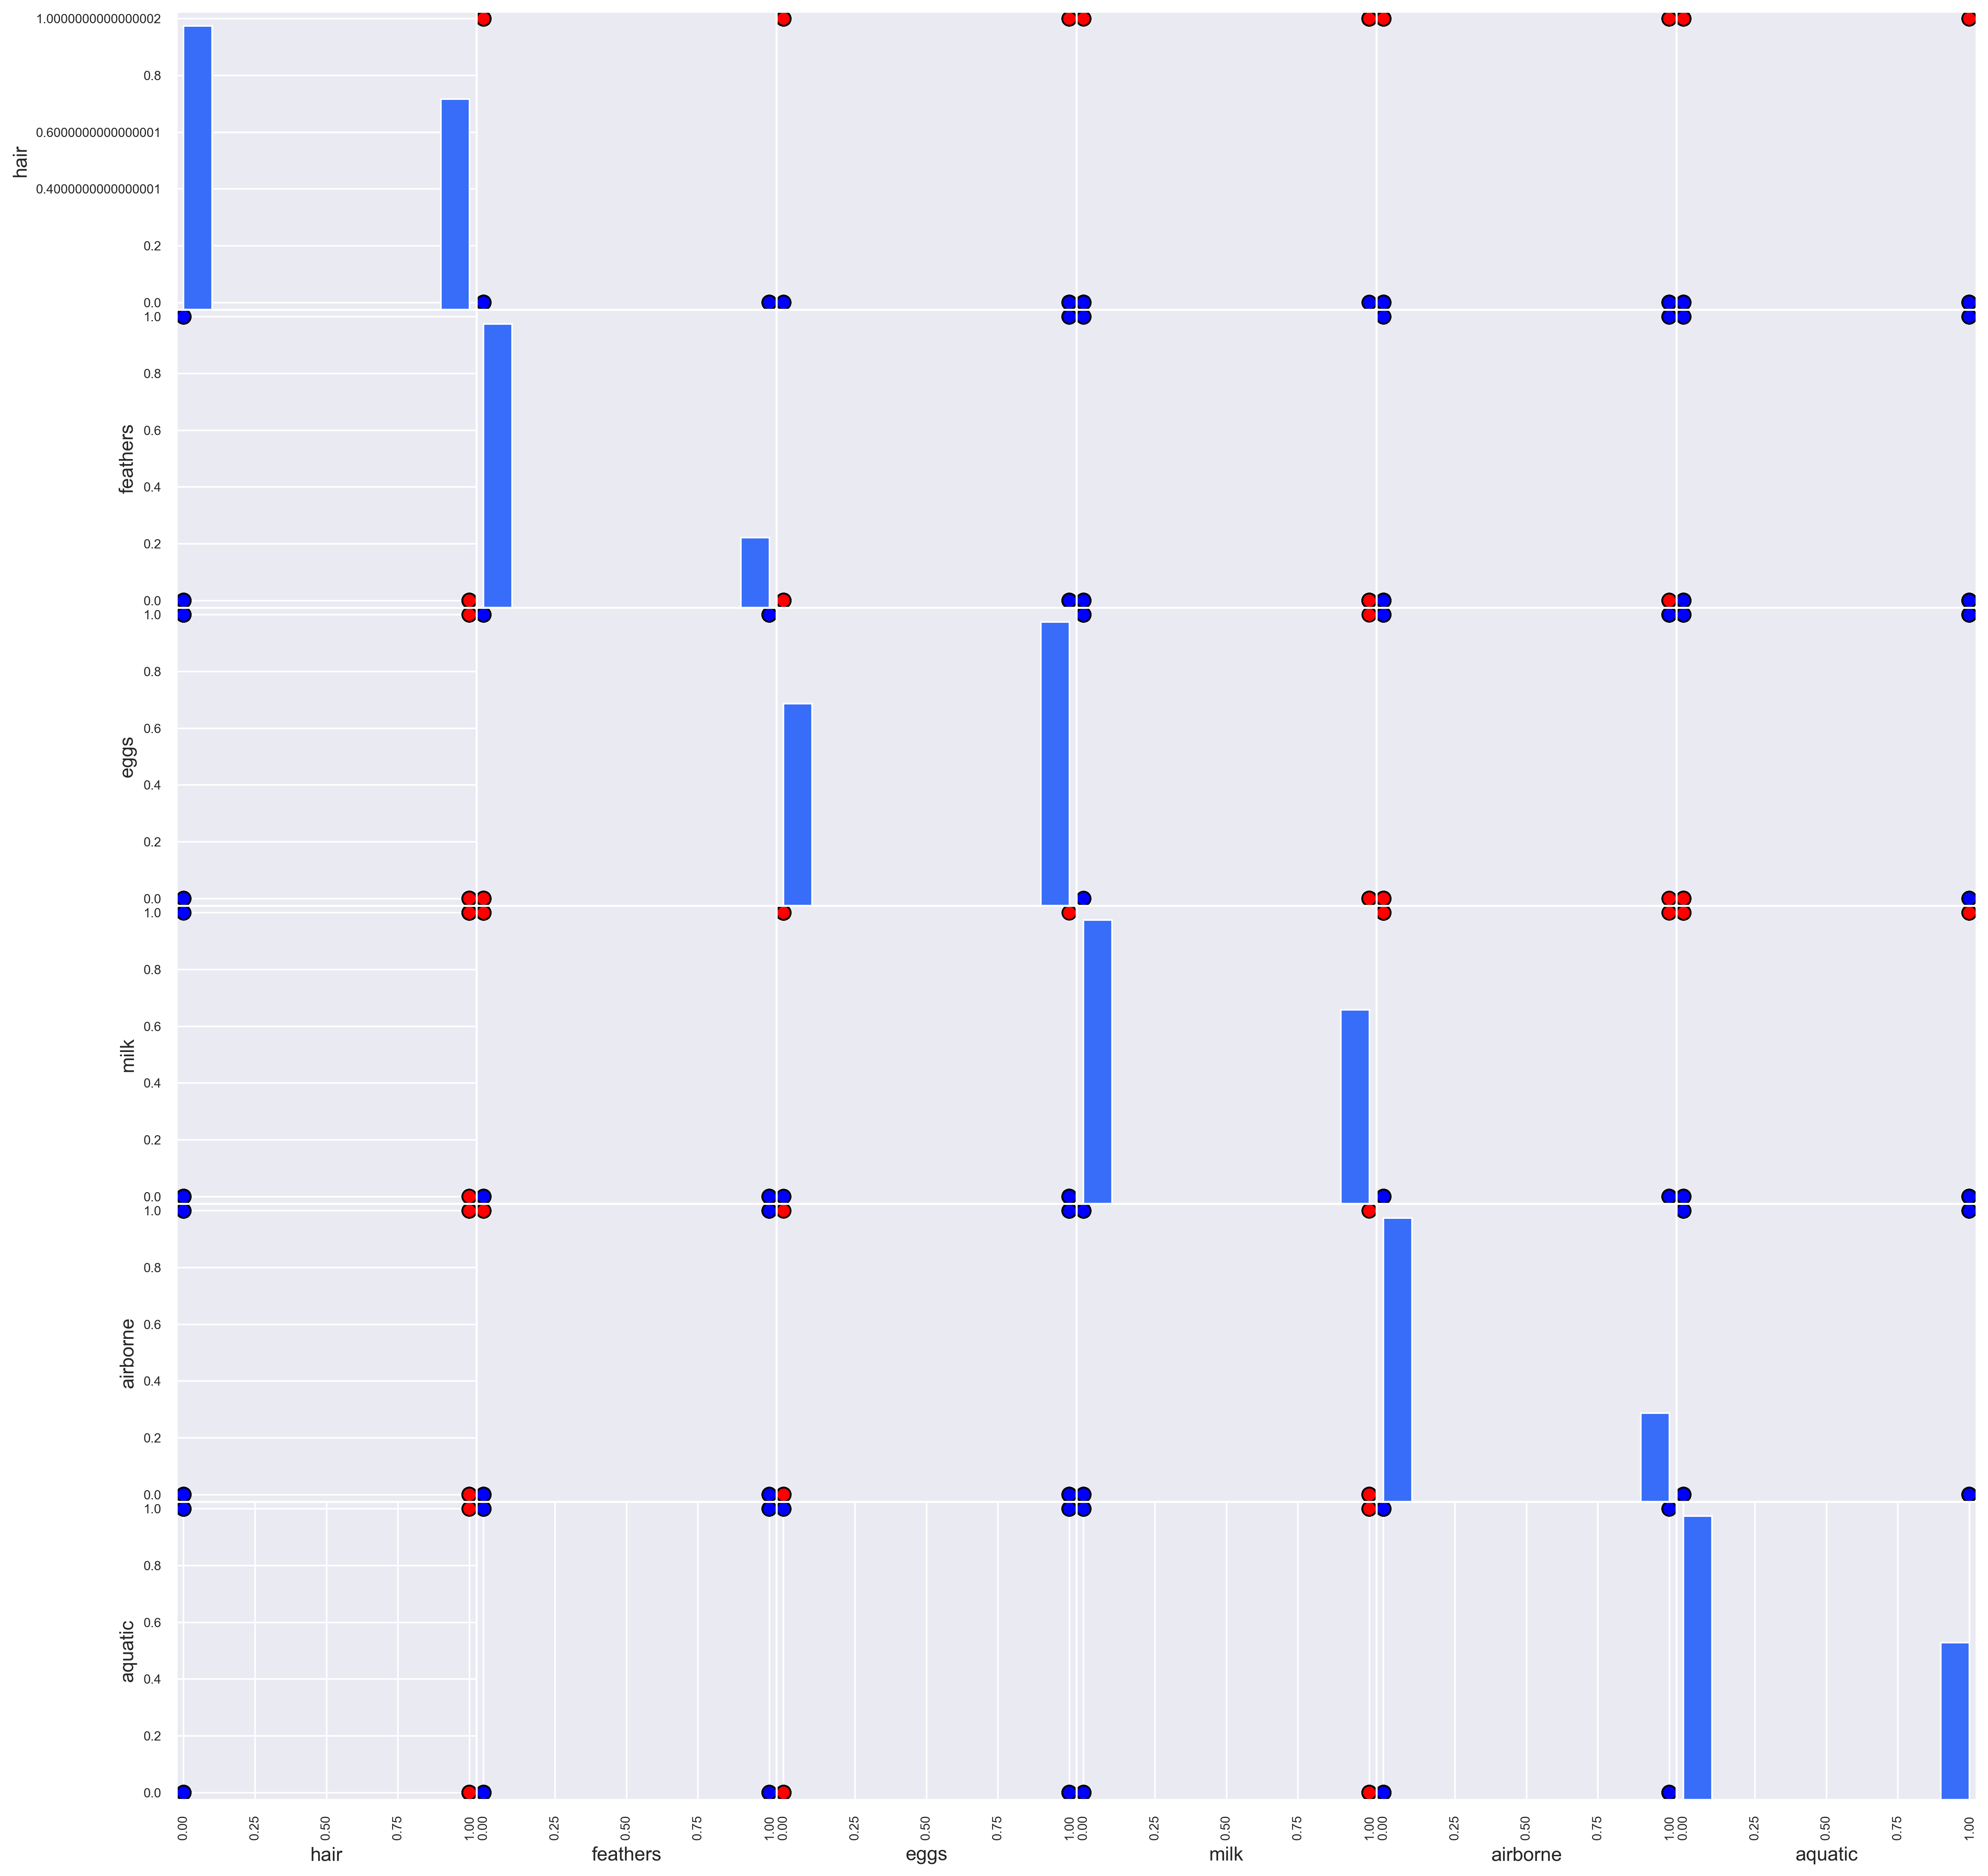

In [52]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(zoo.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

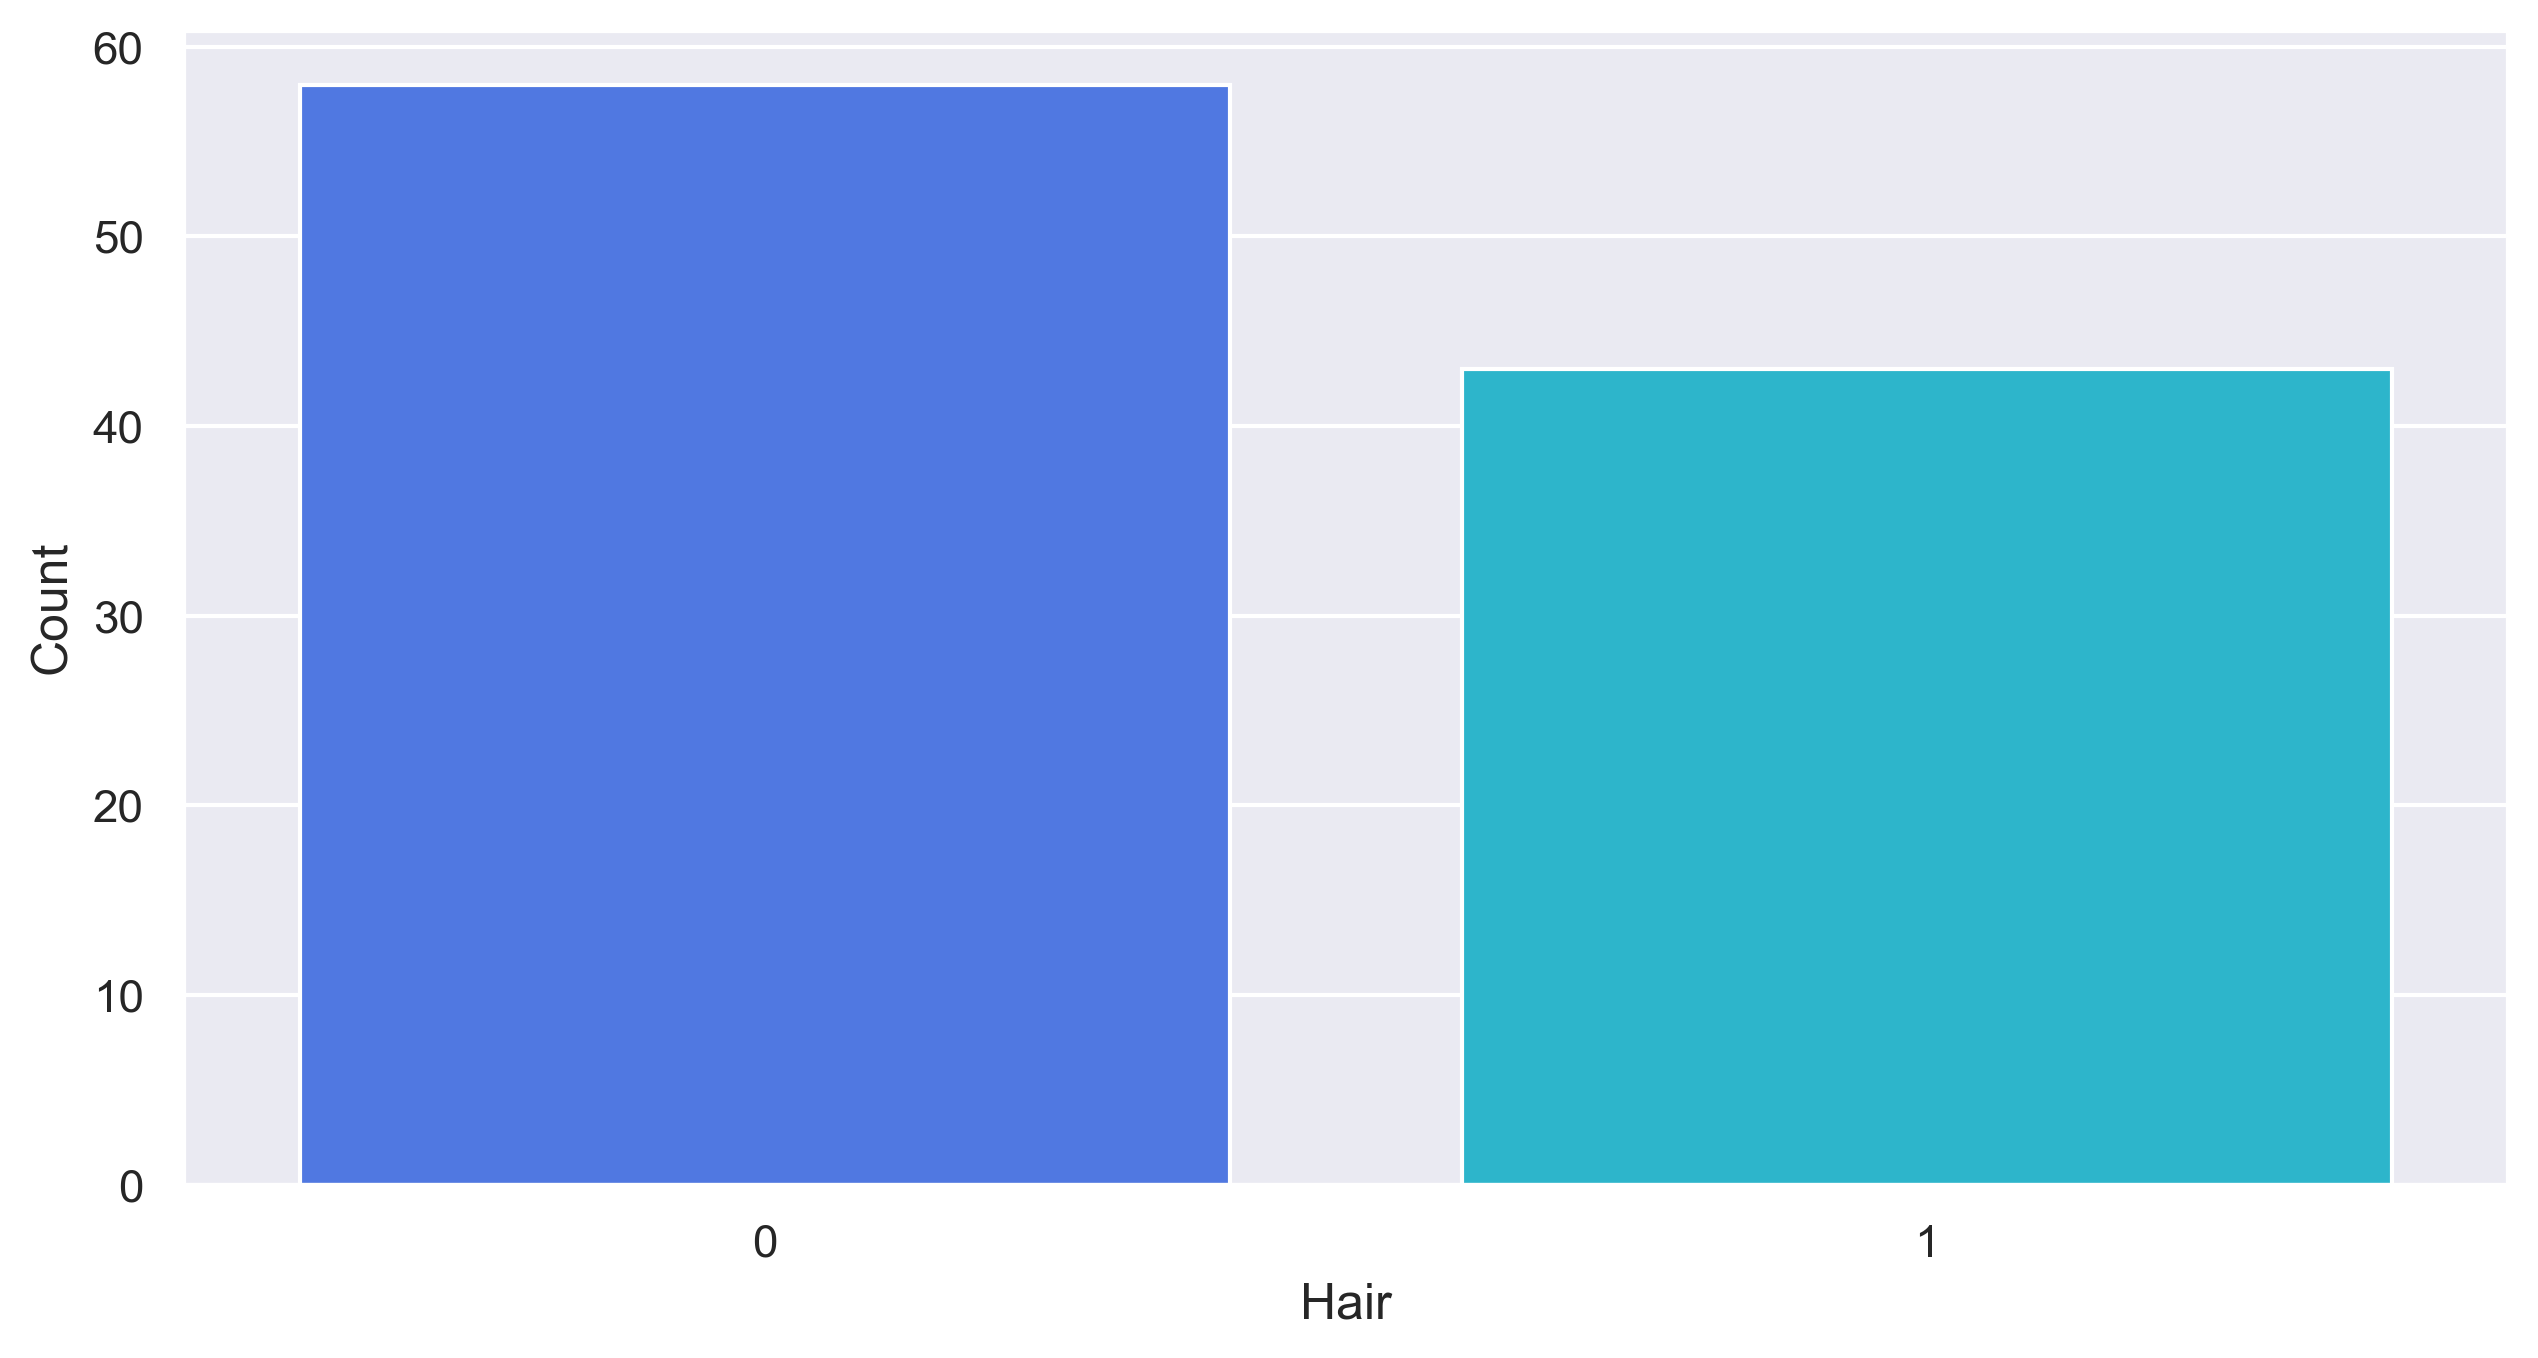

0    58
1    43
Name: hair, dtype: int64

In [53]:
sns.countplot(x="hair", data=zoo)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
zoo.loc[:,'hair'].value_counts()

[]

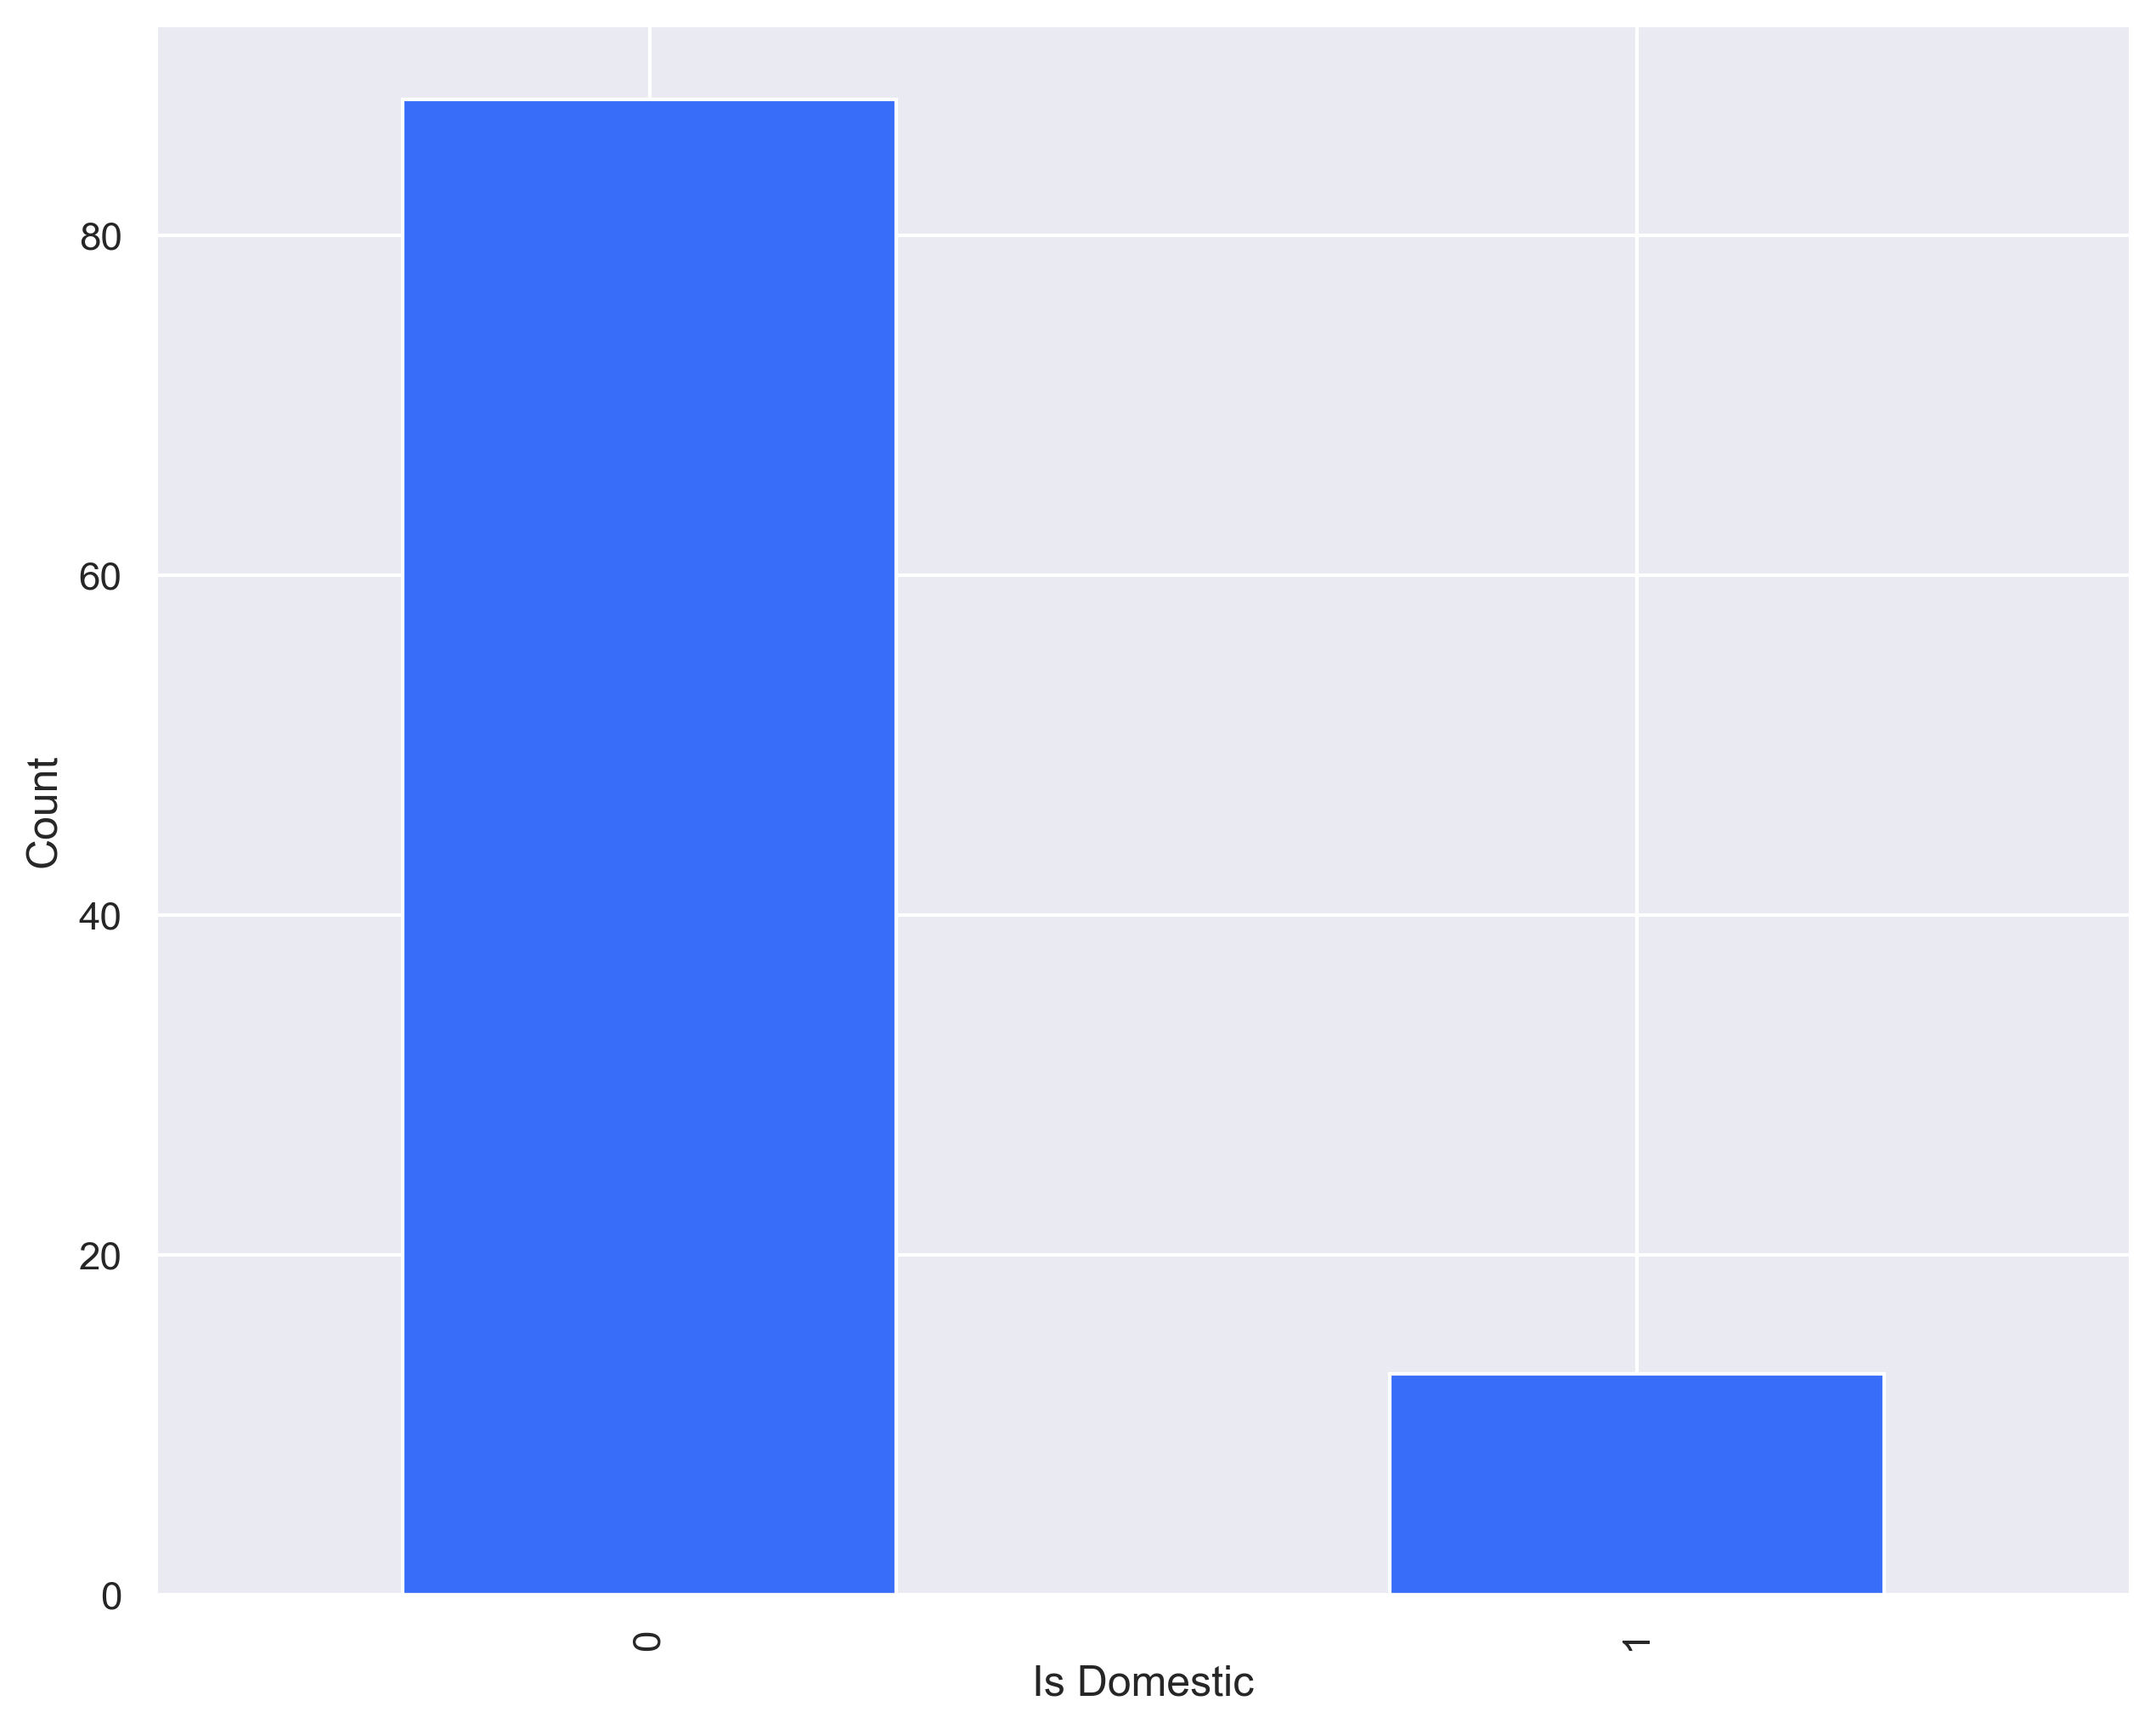

In [54]:
# Lets plot how many animals are domestic or not
plt.figure(figsize=(10,8));
zoo['domestic'].value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot()

In [55]:
# Majority of the animals are not domestic.

In [56]:
pd.crosstab(zoo['type'], zoo['domestic'])

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


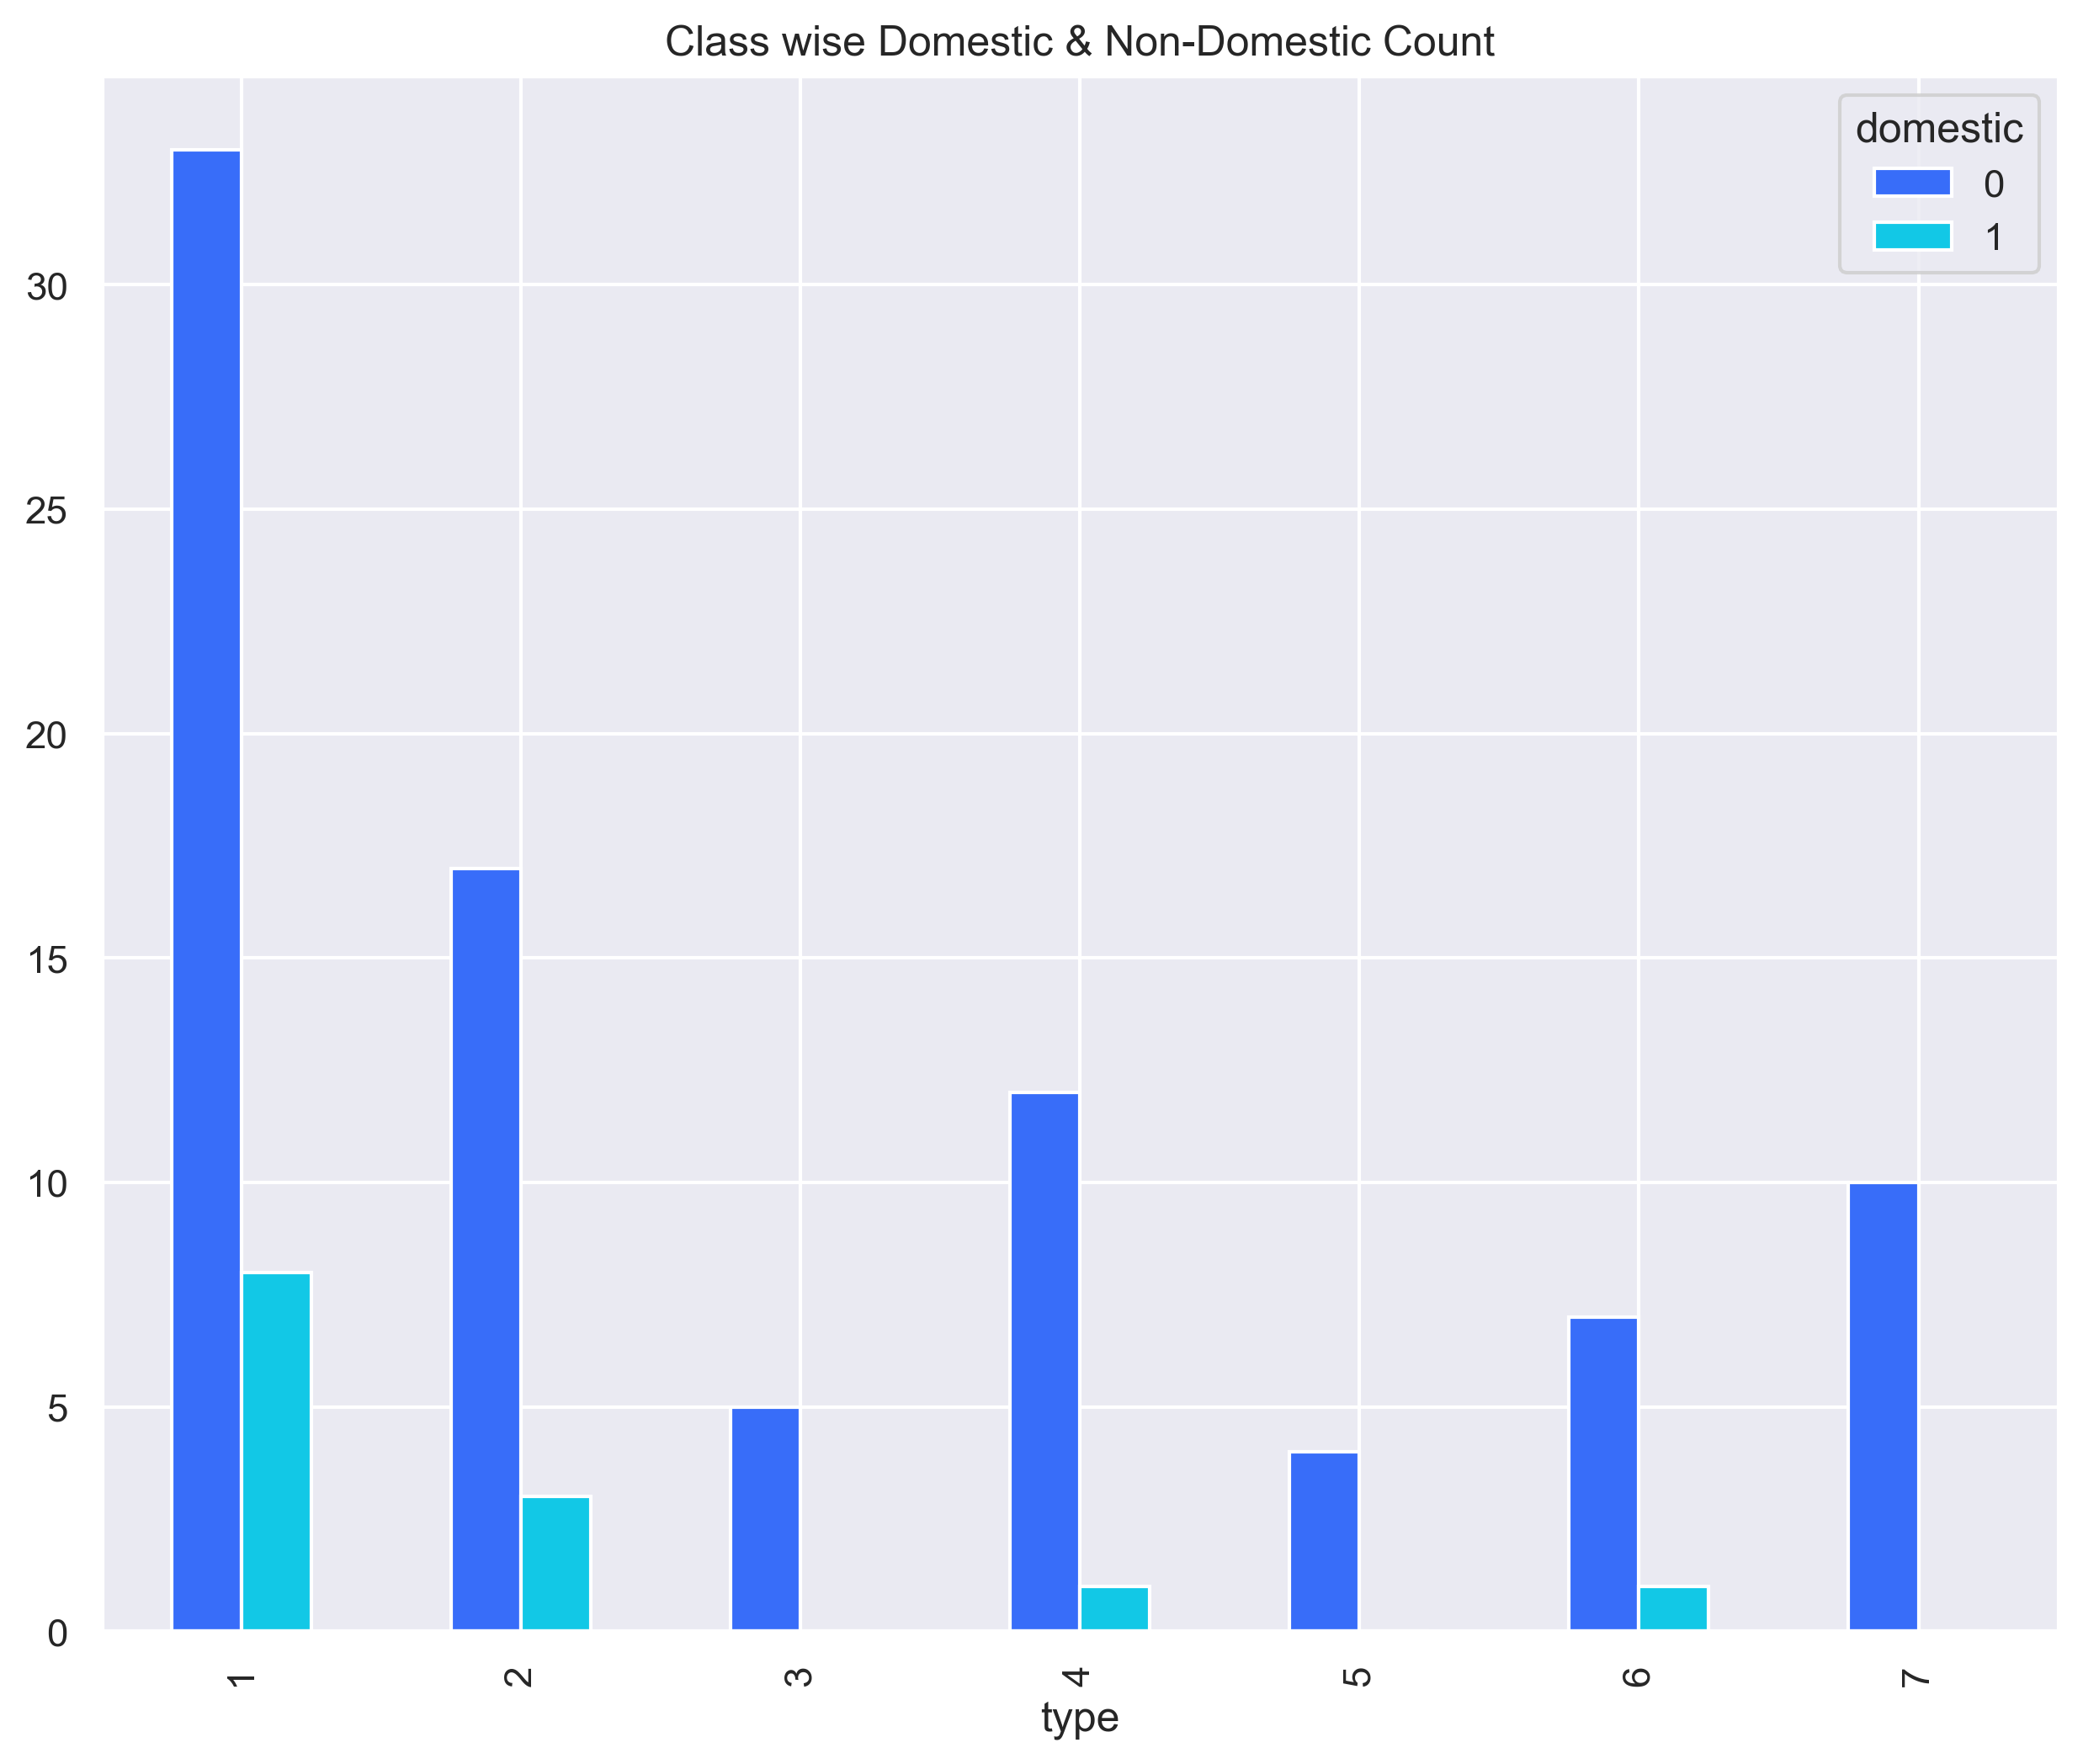

In [57]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(zoo['type'], zoo['domestic']).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [58]:
# Lets see how many animals provides us milk
zoo['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

In [59]:
#There are 41 animals in the list which provides us milk. 
#Lets see to which category they belongs

In [60]:
pd.crosstab(zoo['type'], zoo['milk'])

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


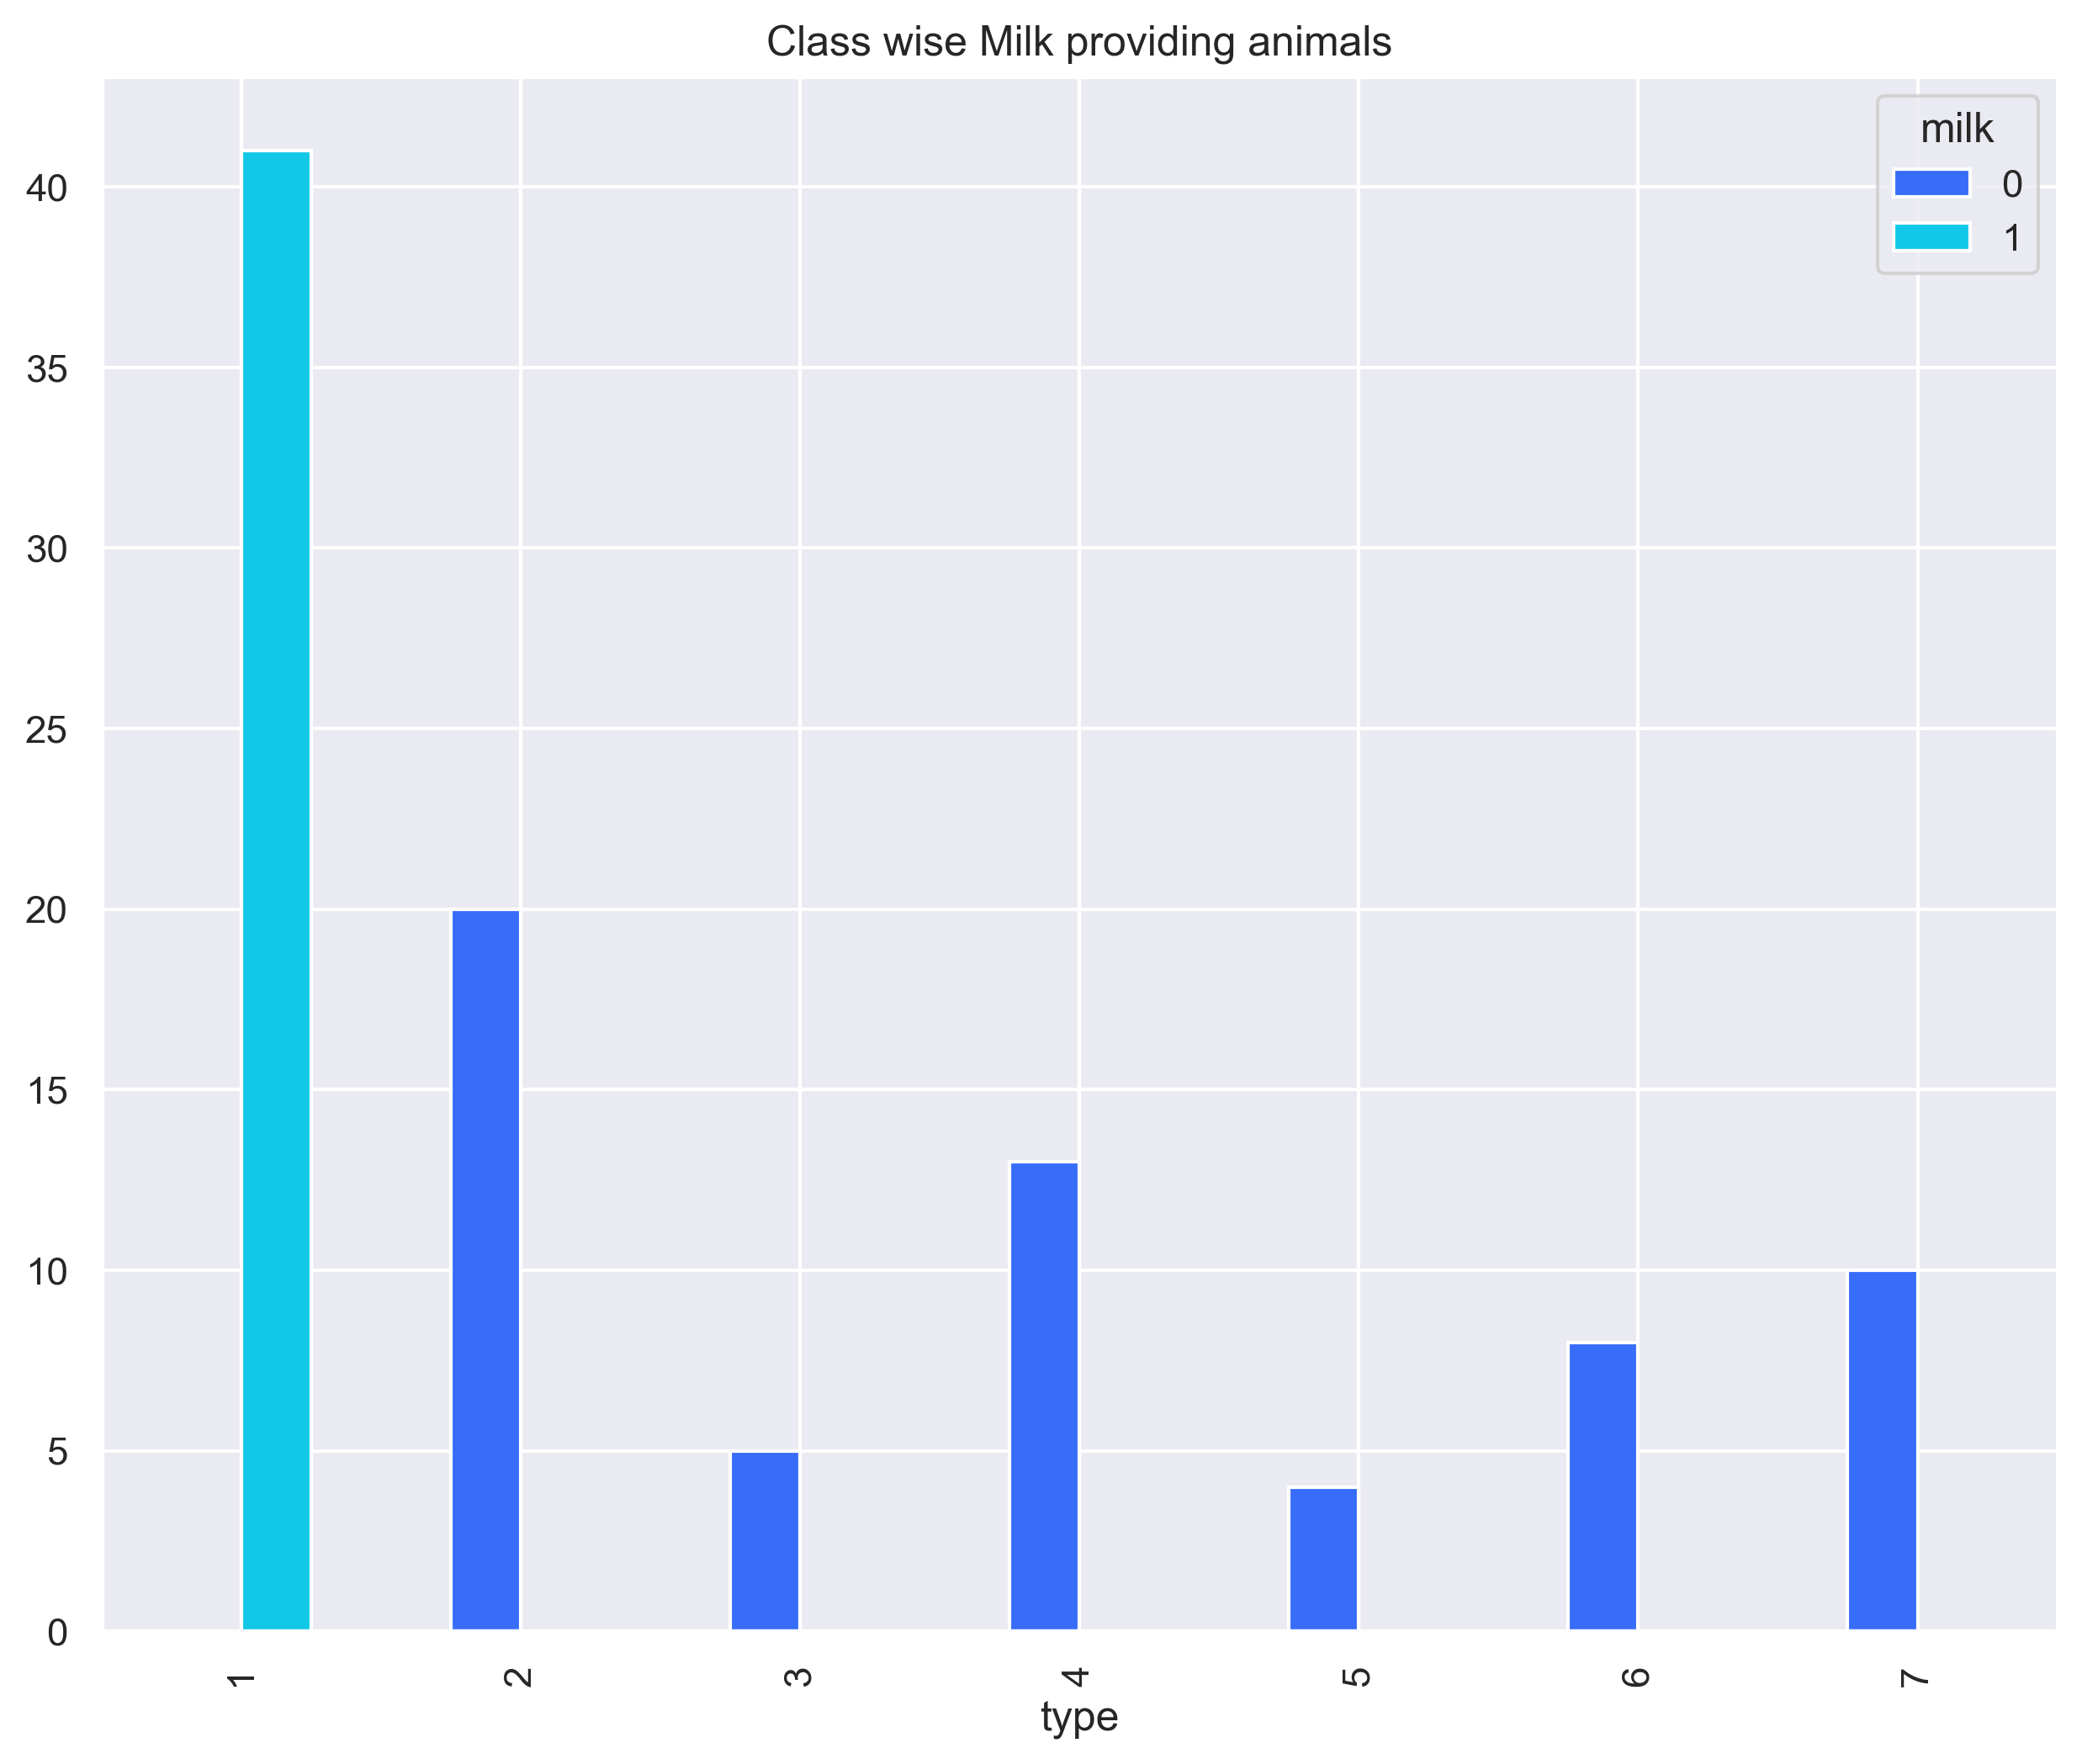

In [61]:
pd.crosstab(zoo['type'], zoo['milk']).plot(kind="bar", figsize=(10, 8), title="Class wise Milk providing animals");
plt.plot();

In [62]:
# Lets see how many animals live under water. i.e aquatic
# lets find out all the aquatic animals.
zoo.aquatic.value_counts() # only 36 aquatic animals are there.
# lets see their class.

0    65
1    36
Name: aquatic, dtype: int64

In [63]:
zoo[zoo['aquatic']==1].type.value_counts()

4    13
7     6
1     6
2     6
5     4
3     1
Name: type, dtype: int64

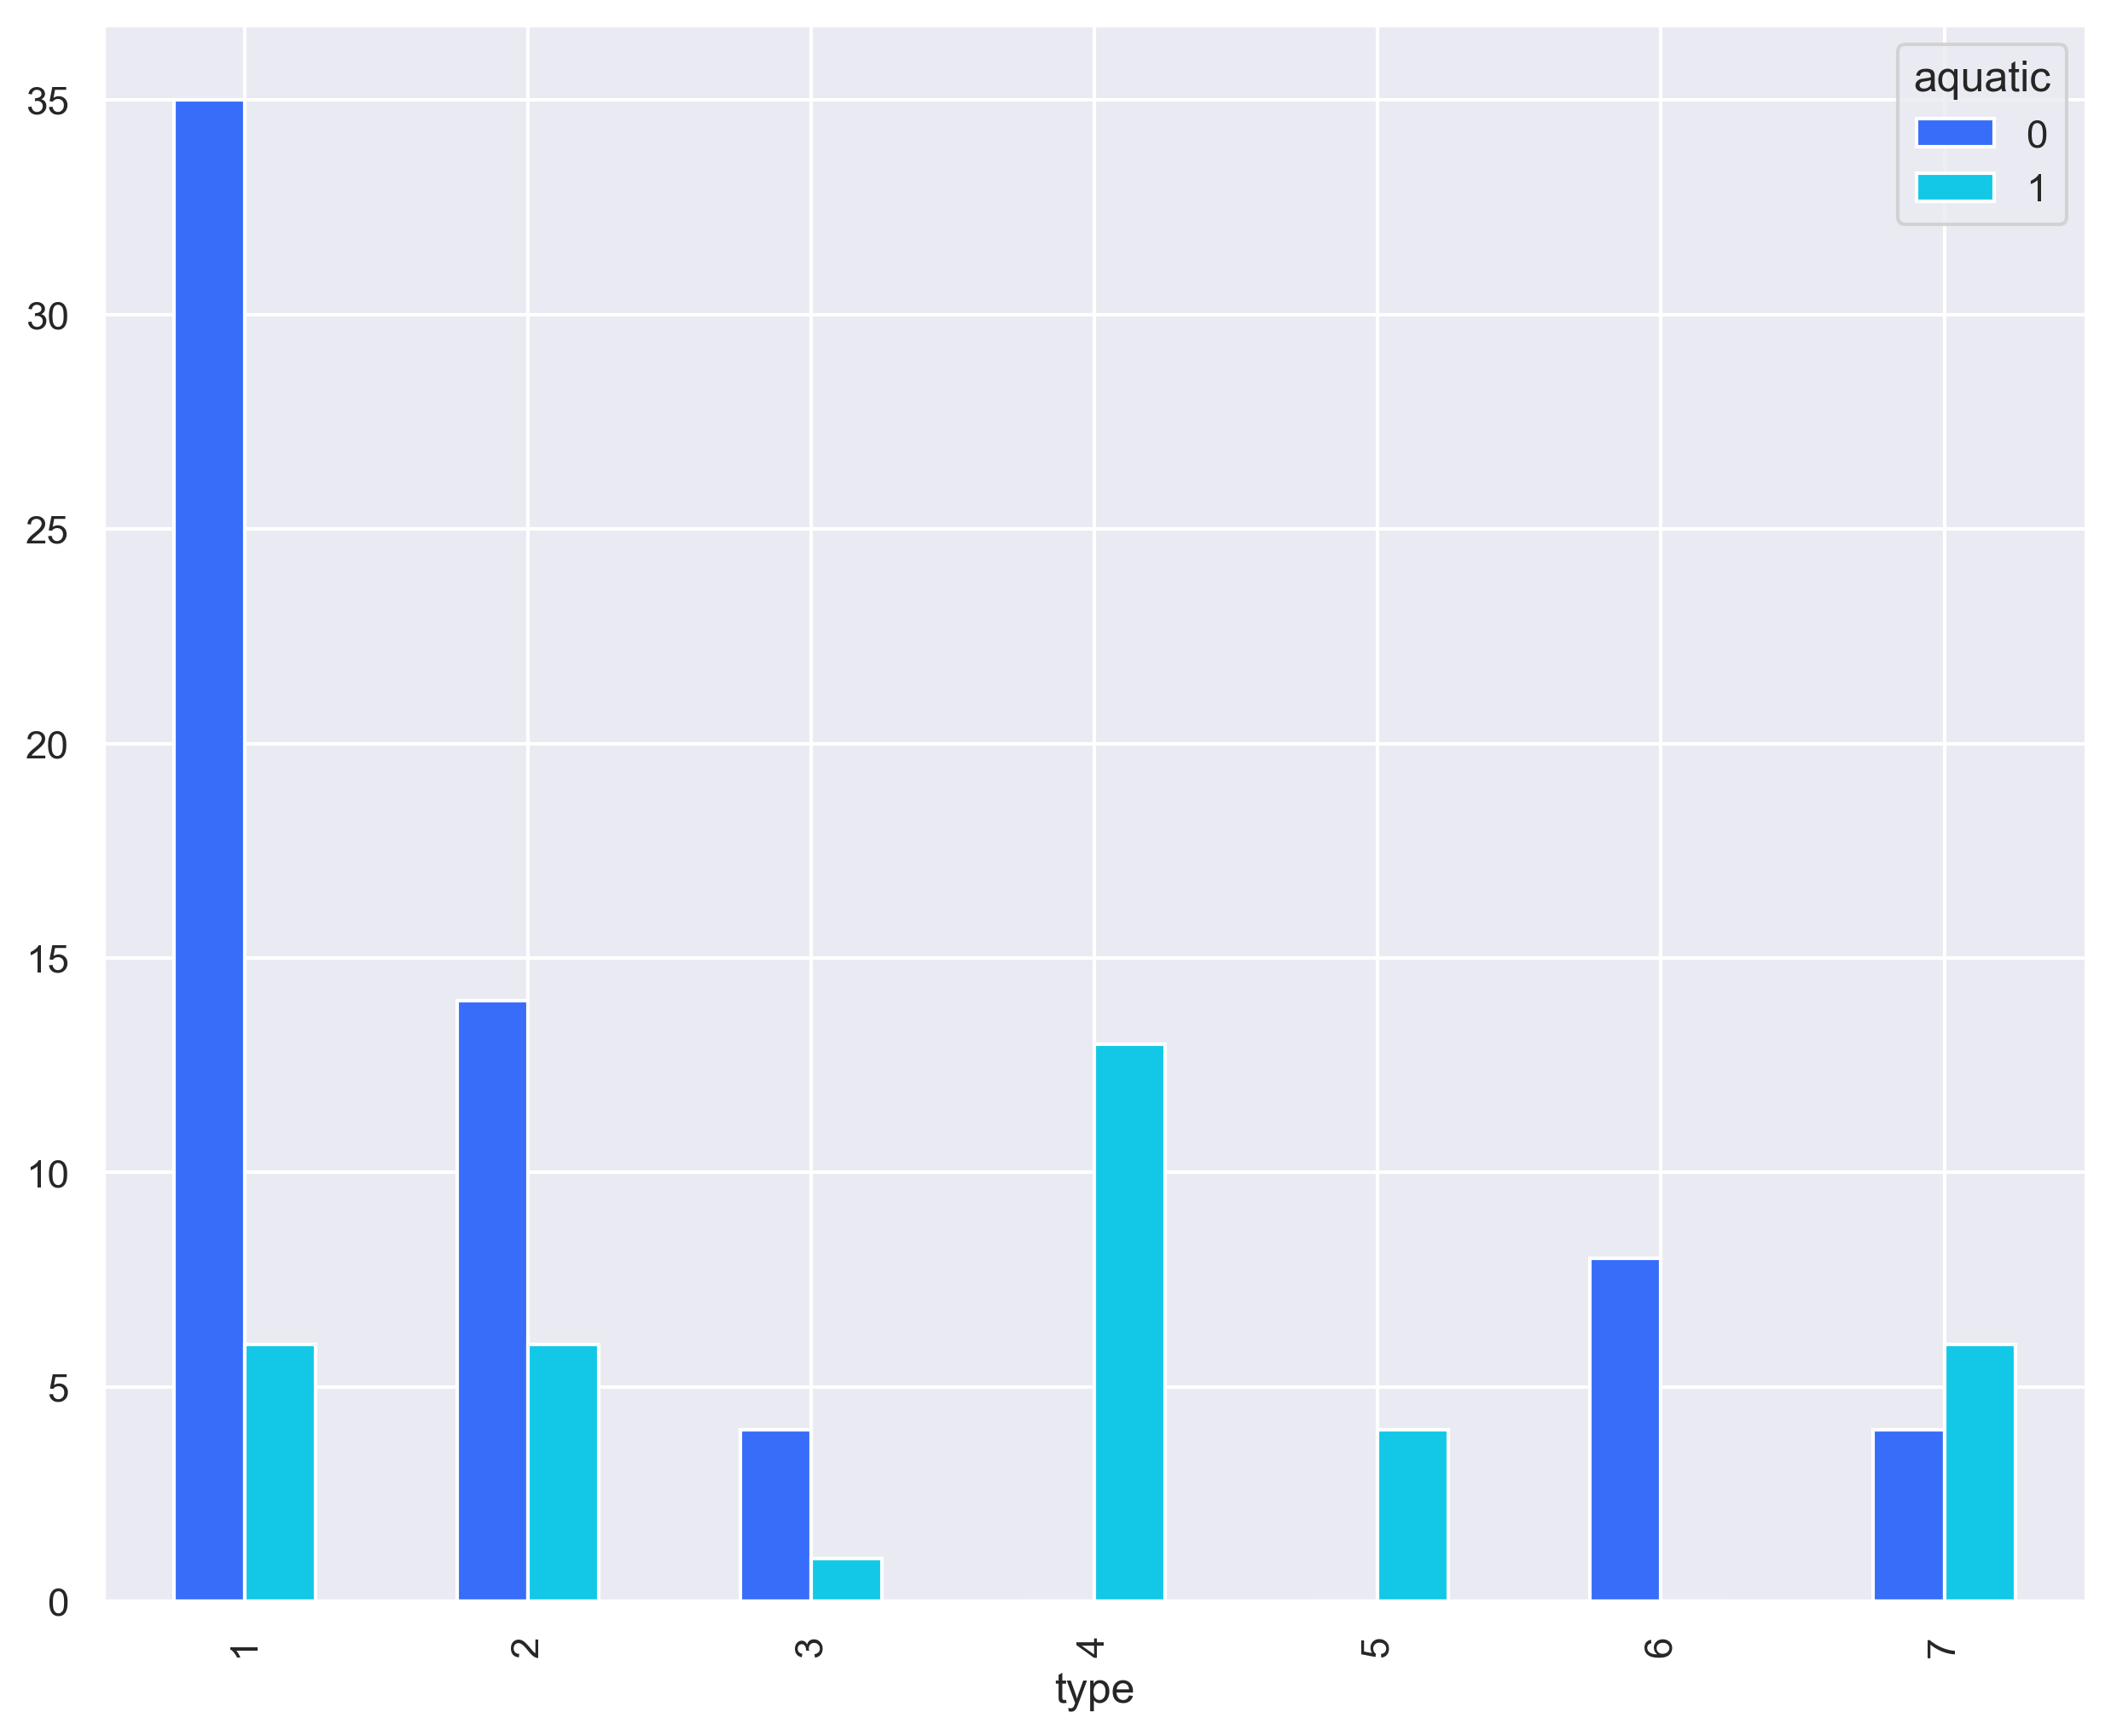

In [64]:
pd.crosstab(zoo['type'], zoo['aquatic']).plot(kind="bar", figsize=(10, 8));

In [65]:
# finding Unique value of class_type
type_list = [i for i in zoo.type]
unique_type = list(set(type_list))
unique_type

[1, 2, 3, 4, 5, 6, 7]

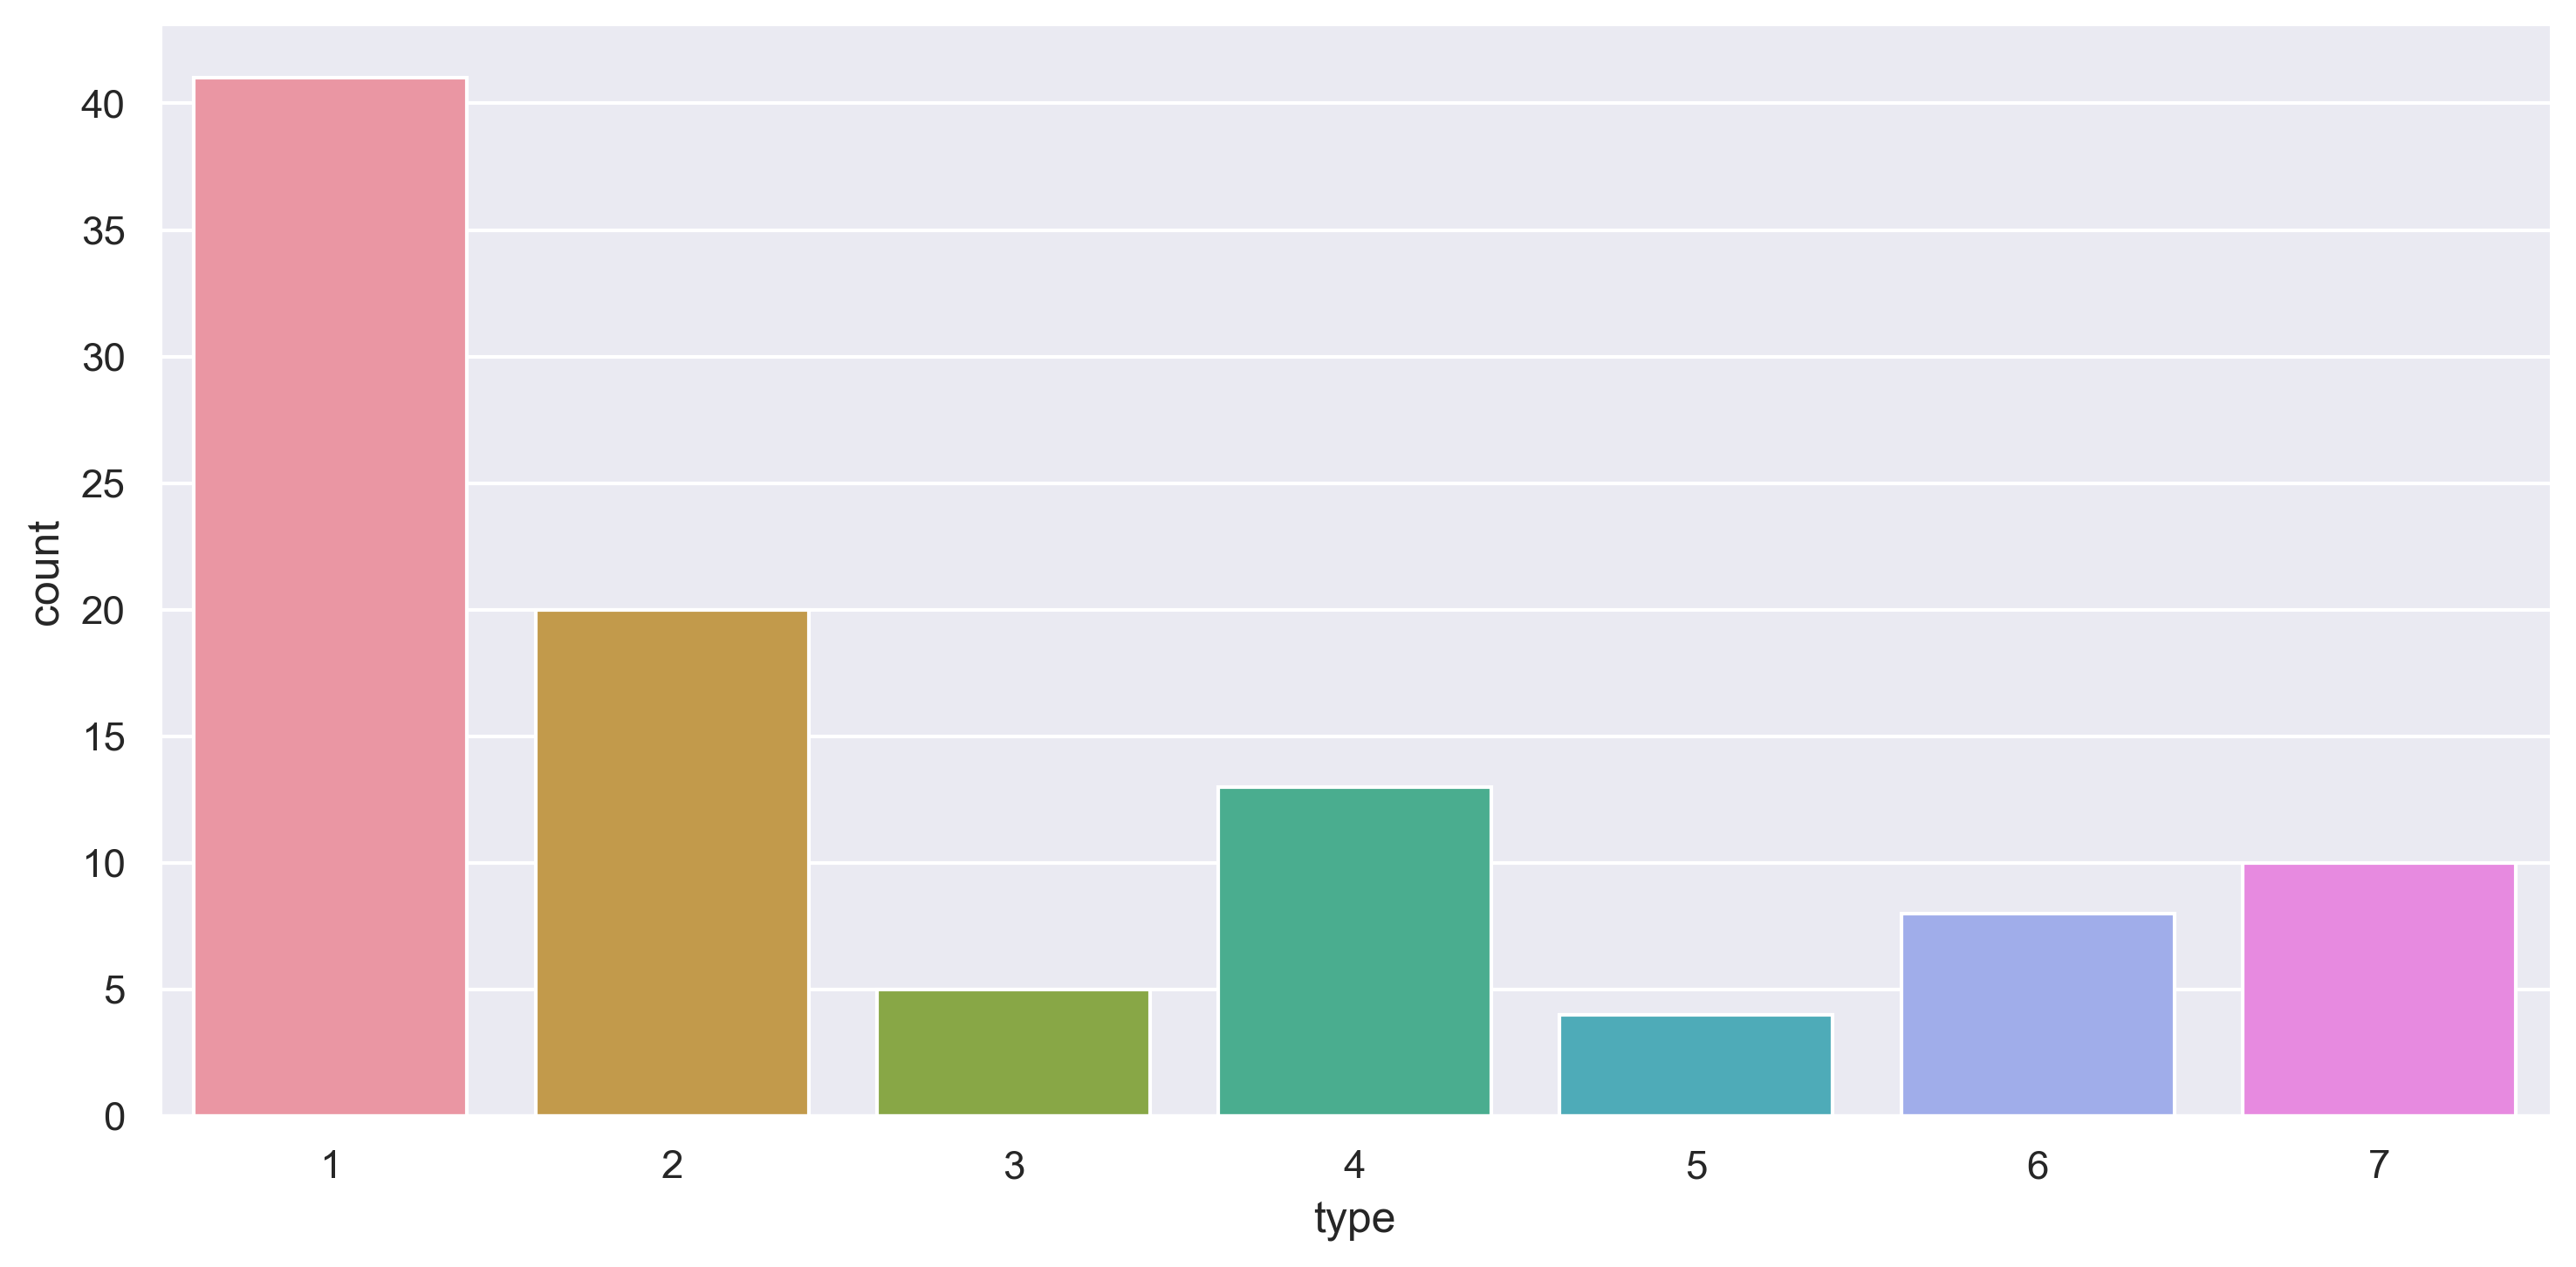

In [66]:
# Use seaborn to plot the count of each class_type
sns.catplot(x='type', data=zoo, kind="count", height=5, aspect=2)


In [67]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [80]:
subset = zoo.iloc[:, 1:]
subset

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
non_numeric_columns = zoo.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['animal name'], dtype='object')


In [84]:
sc = StandardScaler() #create instance for standardization 
 
X = sc.fit_transform(subset)
X

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  0.55839574],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  1.99224243],
       [-0.86103386,  2.01246118,  0.84372057, ..., -0.38435306,
        -0.87859537, -0.39750205]])

In [85]:
# split train test data into 70/30.
from sklearn.model_selection import train_test_split
X = zoo.iloc[:,1:16]
Y = zoo.iloc[:,16]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [86]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0
42,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0
70,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1
15,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
71,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0
14,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0
92,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0


In [87]:
X_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
66,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
45,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
39,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
44,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0


In [88]:
Y_train

89    0
26    0
42    0
70    1
15    0
     ..
60    1
71    1
14    0
92    1
51    0
Name: catsize, Length: 80, dtype: int64

In [89]:
Y_test

84    0
55    1
66    1
67    1
45    1
39    0
22    1
44    1
10    1
0     1
18    1
30    0
97    0
33    0
77    0
4     1
93    0
78    0
12    0
31    1
76    0
Name: catsize, dtype: int64

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
knn = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn.fit(X_train, Y_train)

# Make predictions
Y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Confusion Matrix:
[[ 8  2]
 [ 1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.83      0.91      0.87        11

    accuracy                           0.86        21
   macro avg       0.86      0.85      0.86        21
weighted avg       0.86      0.86      0.86        21



In [92]:
#use cross validation score since this is a small size dataset 
#Get cross validation score of K-Nearest Neighbors

In [110]:
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this number as needed

# Instantiate KFold cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Now, you can use the defined kfold object in cross-validation
results = cross_val_score(model, X, Y, cv=kfold)
print(results)


[ 0.59342072  0.20151811 -0.01543416  0.1860836  -0.06938927]


In [111]:
print(results.mean()*100)

17.923980019741375


In [112]:
print(results.std()*100)

23.315375077584097


In [113]:
#Grid Search for Algorithm Tuning

In [114]:
n_neighbors = np.array(range(1,11))
param_grid = dict(n_neighbors=n_neighbors)

In [115]:
train_acc = [] #created two empty list for train and test
test_acc = []

for i in range(1,40): #for loop for range 1-19 if doesnt work change the range 
    knn = KNeighborsClassifier(n_neighbors=i) #create instance for knn and assign k-value
    knn.fit(X_train,Y_train) #perform required cals for knn
    train_acc.append(knn.score(X_train,Y_train)) #append acc for train
    test_acc.append(knn.score(X_test,Y_test)) #append acc for test
    
    #can append in only in list as its mutable 
    #tuple is not mutable cant add the values
    #dictionary not required as doesnt need pair

In [116]:
train_acc

[0.7375,
 0.7125,
 0.7875,
 0.7625,
 0.775,
 0.7625,
 0.775,
 0.75,
 0.7625,
 0.7625,
 0.775,
 0.7625,
 0.7625,
 0.7625,
 0.7125,
 0.7375,
 0.75,
 0.775,
 0.7375,
 0.7375,
 0.725,
 0.725,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7,
 0.7,
 0.7125,
 0.7125,
 0.7,
 0.7125,
 0.7,
 0.7125,
 0.7,
 0.7125,
 0.7,
 0.725,
 0.725]

In [117]:
test_acc

[0.5238095238095238,
 0.42857142857142855,
 0.7142857142857143,
 0.7619047619047619,
 0.8571428571428571,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8571428571428571,
 0.8095238095238095,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8571428571428571,
 0.8571428571428571,
 0.8095238095238095,
 0.8571428571428571,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095]

Best accuracy is 0.8571428571428571 with K = 5


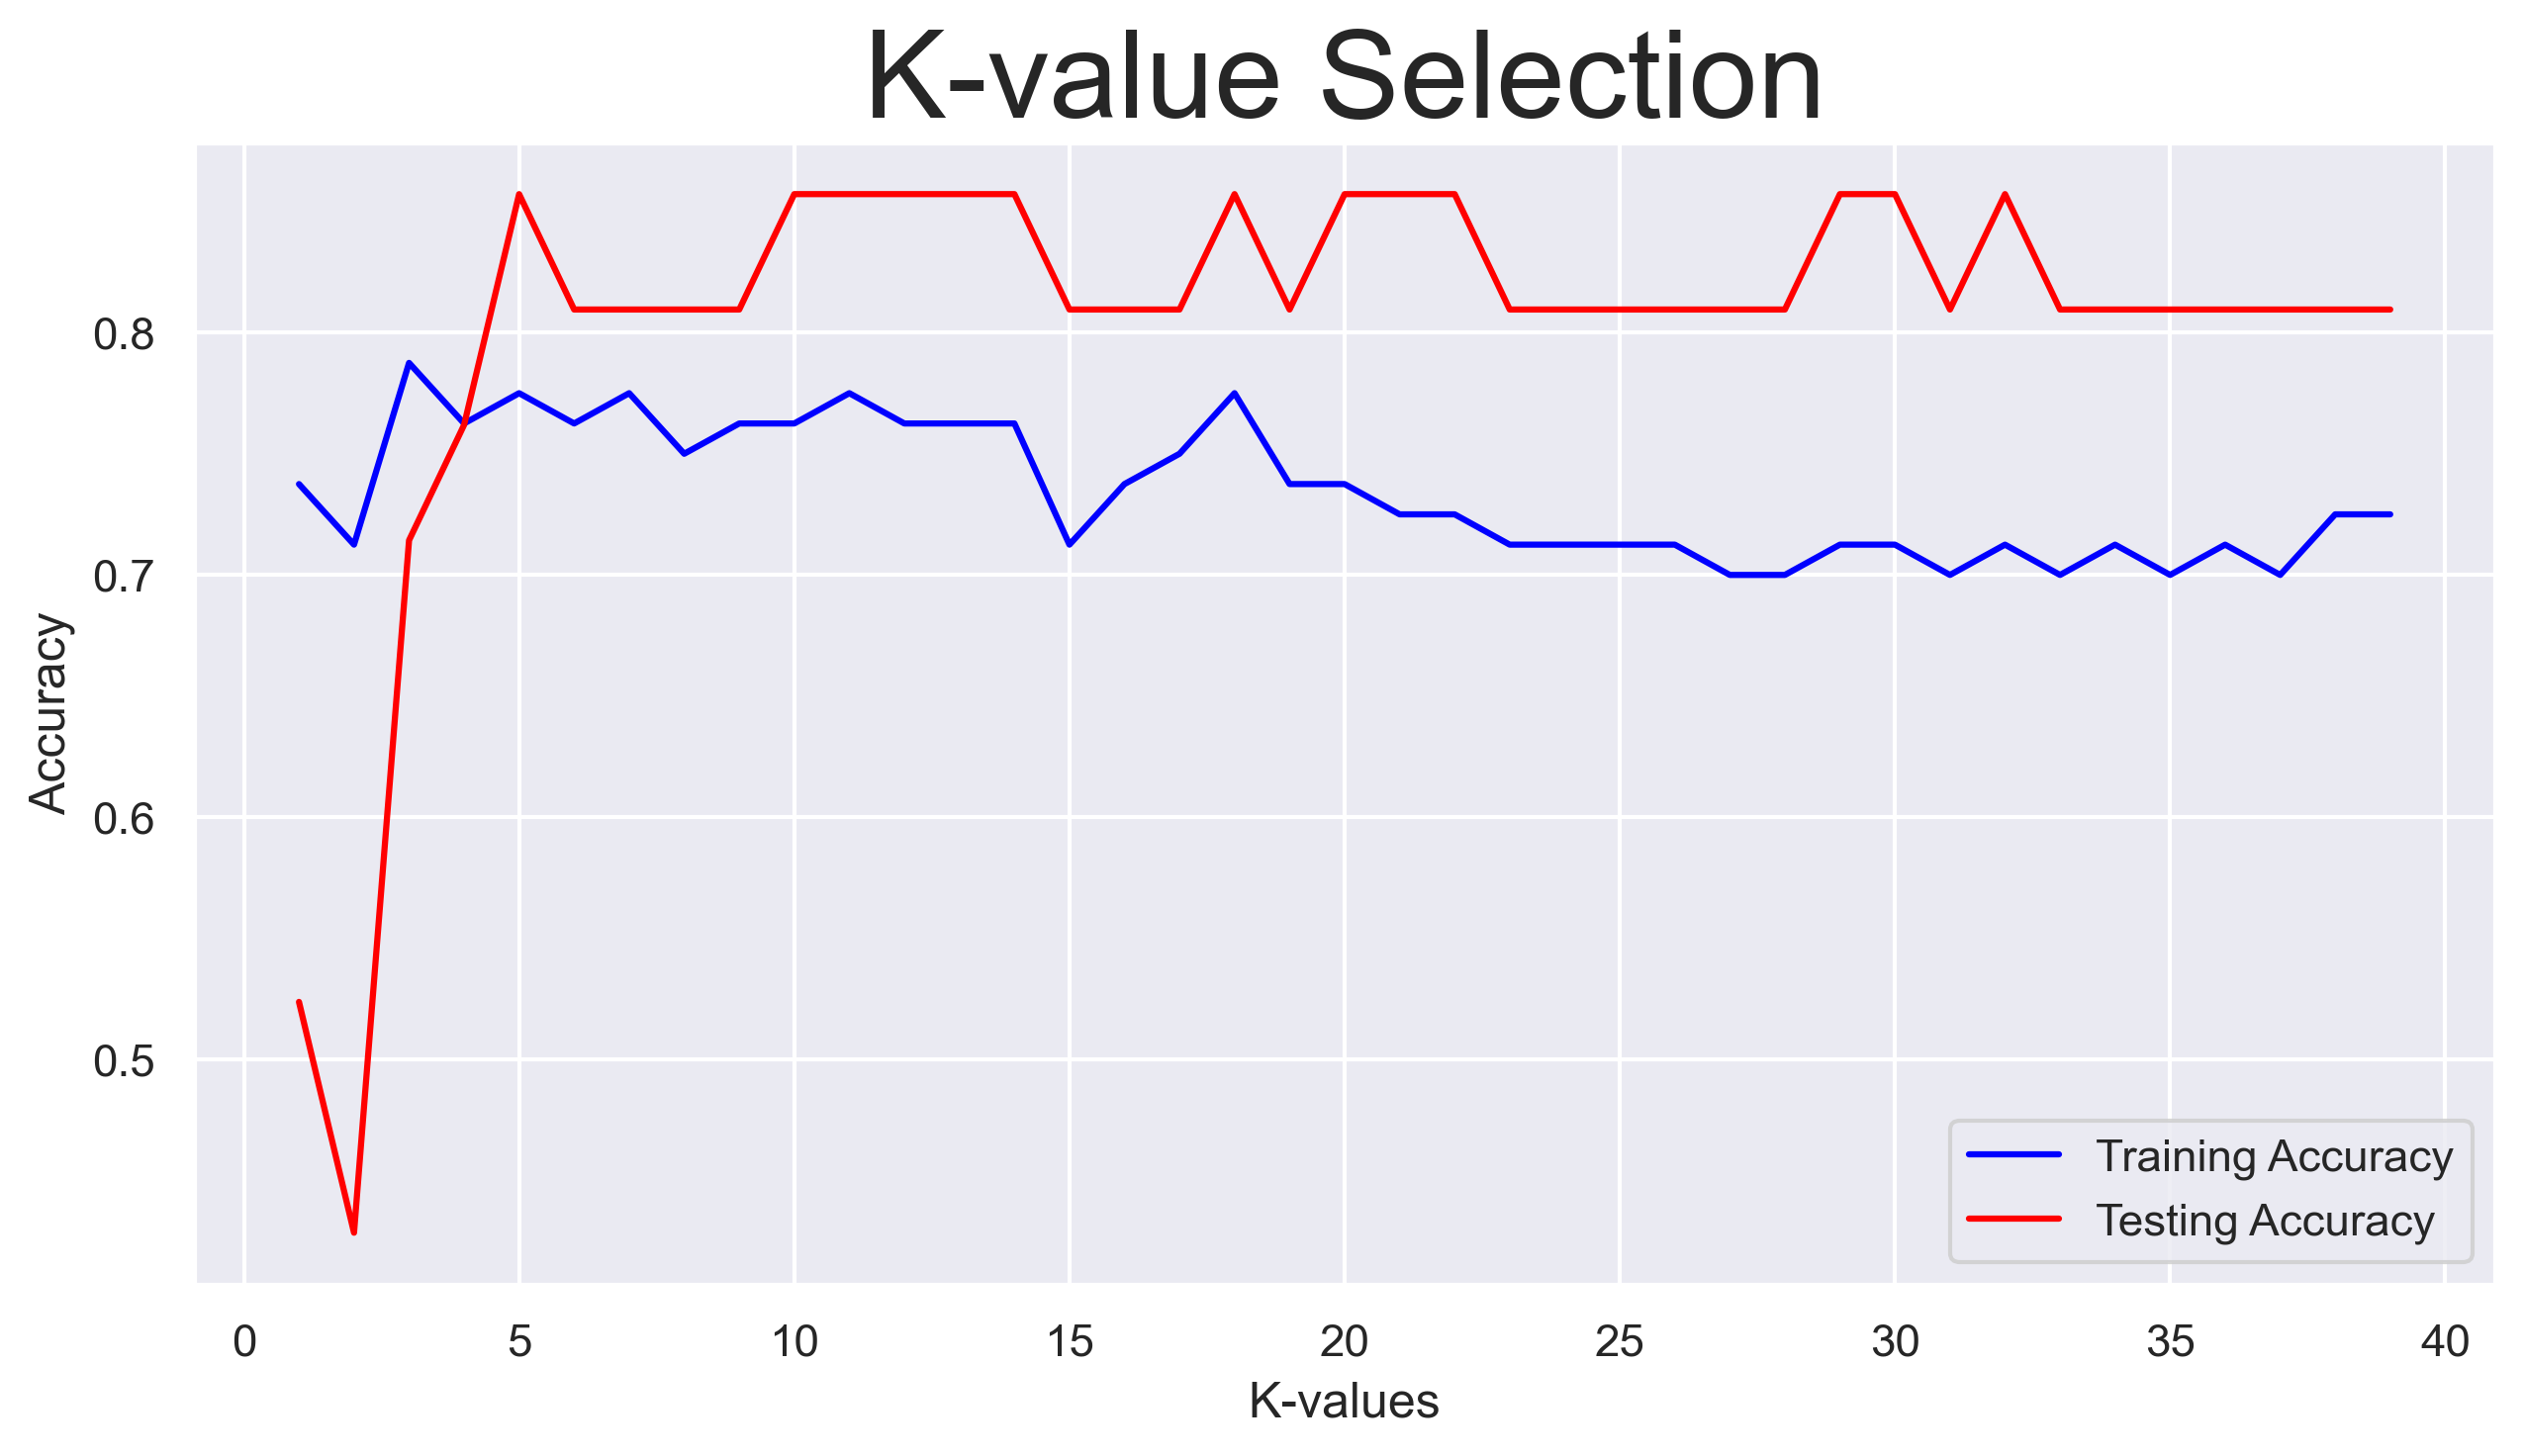

In [121]:
plt.plot(range(1,40), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,40), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection', size = 30)
plt.legend() #to display labels
#k-value is discrete
print("Best accuracy is {} with K = {}".format(np.max(test_acc),1+test_acc.index(np.max(test_acc))))

In [122]:
#check acc with optimal k-value via knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
ypred = knn.predict(X_test)
print(f"Train: {np.round(knn.score(X_train,Y_train),2)}\nTest: {np.round(knn.score(X_test,Y_test),2)}")

Train: 0.78
Test: 0.86
